# Teste prático para Ciência de Dados na PickCells

## Elaborado por Daniela Morais

In [1]:
# Carregando as bibliotecas para realização da análise:

import pandas as pd
import numpy as np
import seaborn as sns
import statistics
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
# Importando o dataset sugerido. Opção de importar diretamente do site https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/CBC_J.XPT

df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/CBC_J.XPT')

In [3]:
df.head(10)

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,...,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC
0,93703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,7.4,47.8,8.0,42.6,1.0,0.7,3.5,0.6,3.2,...,4.25,13.1,37.0,87.0,30.8,35.4,12.8,239.0,8.6,1.000000e-01
2,93705.0,8.6,40.0,7.4,48.8,2.9,1.0,3.4,0.6,4.2,...,5.48,11.9,36.7,67.0,21.7,32.4,15.6,309.0,7.9,5.397605e-79
3,93706.0,6.1,24.6,9.1,61.4,4.3,0.8,1.5,0.6,3.7,...,5.24,16.3,47.0,89.7,31.1,34.7,12.2,233.0,6.6,5.397605e-79
4,93707.0,11.2,37.1,6.2,54.7,1.6,0.5,4.2,0.7,6.1,...,5.02,14.5,42.1,83.9,28.9,34.4,13.6,348.0,8.5,2.000000e-01
5,93708.0,6.0,31.3,6.8,59.4,2.0,0.7,1.9,0.4,3.6,...,4.59,13.2,39.9,86.8,28.8,33.1,13.4,226.0,9.1,2.000000e-01
6,93709.0,7.2,25.8,6.8,66.1,0.8,0.6,1.9,0.5,4.8,...,5.13,15.4,45.5,88.8,30.0,33.8,15.7,228.0,9.0,5.397605e-79
7,93711.0,5.0,35.5,10.0,53.0,1.3,0.4,1.8,0.5,2.7,...,4.65,14.7,43.2,92.9,31.7,34.1,13.3,264.0,7.7,1.000000e-01
8,93712.0,7.1,30.6,7.1,59.8,1.8,0.8,2.2,0.5,4.2,...,5.12,15.5,46.9,91.6,30.1,32.9,13.8,211.0,9.1,1.000000e-01
9,93713.0,8.3,34.4,6.9,54.7,3.6,0.6,2.9,0.6,4.5,...,4.52,14.2,42.5,94.0,31.5,33.5,15.3,241.0,9.1,5.397605e-79


In [4]:
# Conhecendo as dimensões do dataset: 8.366 instâncias e 22 atributos

df.shape

(8366, 22)

In [5]:
# Visualizando todos os atributos do dataset:

df.columns.tolist()

['SEQN',
 'LBXWBCSI',
 'LBXLYPCT',
 'LBXMOPCT',
 'LBXNEPCT',
 'LBXEOPCT',
 'LBXBAPCT',
 'LBDLYMNO',
 'LBDMONO',
 'LBDNENO',
 'LBDEONO',
 'LBDBANO',
 'LBXRBCSI',
 'LBXHGB',
 'LBXHCT',
 'LBXMCVSI',
 'LBXMCHSI',
 'LBXMC',
 'LBXRDW',
 'LBXPLTSI',
 'LBXMPSI',
 'LBXNRBC']

In [ ]:
# A fim de facilitar o entendimento das análises, segue abaixo a descrição dos atributos:

# SEQN: Sequencial do respondente
# LBXWBCSI: Contagem de glóbulos brancos (1000 células/uL)
# LBXLYPCT: Porcentagem de linfócitos (%)
# LBXMOPCT: Porcentagem de monócitos (%)
# LBXNEPCT: Porcentagem de neutrófilos segmentados (%)
# LBXEOPCT: Porcentagem de eosinófilos (%)
# LBXBAPCT: Porcentagem de basófilos (%)
# LBDLYMNO: Número de linfócitos (1000 células/uL)
# LBDMONO: Número de monócitos (1000 células/uL)
# LBDNENO: Número de neutrófilos segmentados (1000 células/uL)
# LBDEONO: Número de eosinófilos (1000 células/uL)
# LBDBANO: Número de basófilos (1000 células/uL)
# LBXRBCSI: Contagem de glóbulos vermelhos (milhões de células/uL)
# LBXHGB: Hemoglobina (g/dL)
# LBXHCT: Hematócrito (%)
# LBXMCVSI: Volume celular médio (fL)
# LBXMCHSI: Hemoglobina celular média (pg)
# LBXMC: Concentração de Hemoglobina Média da Célula. (g/dL)
# LBXRDW: Largura de distribuição de células vermelhas (%)
# LBXPLTSI: Contagem de plaquetas (1000 células/uL)
# LBXMPSI: Volume plaquetário médio (fL)
# LBXNRBC: Glóbulos vermelhos nucleados

In [6]:
# Verificando os tipos dos parâmetros e a existência de dados faltantes na base completa:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8366 non-null   float64
 1   LBXWBCSI  7528 non-null   float64
 2   LBXLYPCT  7523 non-null   float64
 3   LBXMOPCT  7523 non-null   float64
 4   LBXNEPCT  7523 non-null   float64
 5   LBXEOPCT  7523 non-null   float64
 6   LBXBAPCT  7523 non-null   float64
 7   LBDLYMNO  7523 non-null   float64
 8   LBDMONO   7523 non-null   float64
 9   LBDNENO   7523 non-null   float64
 10  LBDEONO   7523 non-null   float64
 11  LBDBANO   7523 non-null   float64
 12  LBXRBCSI  7528 non-null   float64
 13  LBXHGB    7528 non-null   float64
 14  LBXHCT    7528 non-null   float64
 15  LBXMCVSI  7528 non-null   float64
 16  LBXMCHSI  7528 non-null   float64
 17  LBXMC     7528 non-null   float64
 18  LBXRDW    7528 non-null   float64
 19  LBXPLTSI  7528 non-null   float64
 20  LBXMPSI   7528 non-null   floa

In [7]:
# Reconhecendo os novos valores de referência

valores_referencia = pd.read_csv('valores_de_referencia.csv')
valores_referencia.head(10)

,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI
0,3.9,14.1,3.8,37.8,0.6,0.1,3.64,10.6,32.0,74.6,24.3,32.1,11.4,152,6.8
1,12.9,47.9,13.5,78.1,8.5,1.7,5.86,17.5,51.4,99.1,34.0,35.3,16.3,441,10.2


In [8]:
valores_referencia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXWBCSI  2 non-null      float64
 1   LBXLYPCT  2 non-null      float64
 2   LBXMOPCT  2 non-null      float64
 3   LBXNEPCT  2 non-null      float64
 4   LBXEOPCT  2 non-null      float64
 5   LBXBAPCT  2 non-null      float64
 6   LBXRBCSI  2 non-null      float64
 7   LBXHGB    2 non-null      float64
 8   LBXHCT    2 non-null      float64
 9   LBXMCVSI  2 non-null      float64
 10  LBXMCHSI  2 non-null      float64
 11  LBXMC     2 non-null      float64
 12  LBXRDW    2 non-null      float64
 13  LBXPLTSI  2 non-null      int64  
 14  LBXMPSI   2 non-null      float64
dtypes: float64(14), int64(1)
memory usage: 256.0 bytes


In [10]:


df_2 = df.dropna()

In [11]:
# Para seguir com a análise, vamos manter apenas as variáveis que estão mencionadas no arquivo valores_de_referência.csv,
# retirando os demais parãmetros do dataframe.

df_2 = df.drop(["LBDLYMNO", "LBDMONO", "LBDNENO", "LBDEONO", "LBDBANO", "LBXNRBC",], axis=1)

In [13]:
# Retirando os dados faltantes do dataframe para seguir com as análises descritivas

df_2 = df_2.dropna()

In [14]:
df_2

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI
1,93704.0,7.4,47.8,8.0,42.6,1.0,0.7,4.25,13.1,37.0,87.0,30.8,35.4,12.8,239.0,8.6
2,93705.0,8.6,40.0,7.4,48.8,2.9,1.0,5.48,11.9,36.7,67.0,21.7,32.4,15.6,309.0,7.9
3,93706.0,6.1,24.6,9.1,61.4,4.3,0.8,5.24,16.3,47.0,89.7,31.1,34.7,12.2,233.0,6.6
4,93707.0,11.2,37.1,6.2,54.7,1.6,0.5,5.02,14.5,42.1,83.9,28.9,34.4,13.6,348.0,8.5
5,93708.0,6.0,31.3,6.8,59.4,2.0,0.7,4.59,13.2,39.9,86.8,28.8,33.1,13.4,226.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,5.1,34.9,7.1,56.2,1.3,0.6,4.64,13.4,40.6,87.7,29.0,33.1,13.3,161.0,9.1
8362,102953.0,8.3,28.3,6.8,60.8,3.6,0.6,5.01,15.5,44.4,88.8,30.9,34.8,13.6,227.0,8.7
8363,102954.0,5.1,43.5,11.8,39.9,3.5,1.4,3.72,6.4,23.1,61.9,17.3,27.9,19.6,145.0,9.7
8364,102955.0,11.4,33.4,7.3,57.5,1.1,0.9,4.93,11.4,33.7,68.4,23.1,33.7,17.4,382.0,7.7


In [15]:
# Realizando amostragem de 30% da database:
# Por se tratar de uma base sem classificação, foi realizada uma amostragem aleatória simples.

df_2 = df_2.sample(n=2256)

In [16]:
df_2.head()

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI
7169,101618.0,6.8,36.1,10.9,47.2,4.9,1.0,4.50,12.7,36.8,81.7,28.2,34.4,13.2,305.0,8.9
8097,102659.0,5.9,33.7,12.9,47.2,5.4,0.9,4.10,13.1,38.2,93.1,31.9,34.3,13.0,226.0,6.6
2058,95969.0,6.2,43.9,8.1,44.6,3.2,0.3,4.98,14.9,43.3,87.1,30.0,34.4,13.7,212.0,8.4
7937,102478.0,4.3,43.4,11.3,43.4,1.5,0.5,5.04,14.6,43.6,86.6,29.0,33.4,14.1,213.0,7.8
3595,97671.0,14.8,25.4,7.2,64.3,2.1,1.1,4.41,12.0,35.9,81.5,27.3,33.6,15.7,360.0,7.3


In [ ]:
# Análise descritiva de todos os parâmetros

### LBXWBCSI: Contagem de glóbulos brancos (1000 células/uL)
Faixa de valor 3,9 a 12,9

In [23]:
# Análise descritiva da base completa, a fim de identificar a existência ou não de pontos fora dos limites
# estabelecidos pelo arquivo valores_de_referencia.csv

df.LBXWBCSI.describe() # geral

count    7528.000000
mean        7.383103
std         5.106263
min         1.900000
25%         5.800000
50%         7.000000
75%         8.500000
max       400.000000
Name: LBXWBCSI, dtype: float64

In [24]:
df_2.LBXWBCSI.describe() # amostra

count    2256.000000
mean        7.327349
std         2.300890
min         1.900000
25%         5.700000
50%         7.000000
75%         8.500000
max        41.900000
Name: LBXWBCSI, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior.

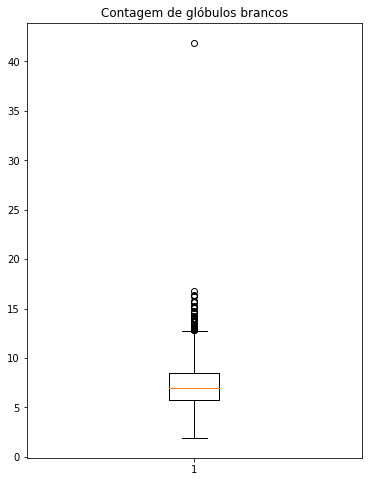

In [22]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXWBCSI'])
plt.title("Contagem de glóbulos brancos")
plt.show()

### LBXLYPCT: Porcentagem de linfócitos
Faixa de valor 14,1 a 47,9

In [20]:
df.LBXLYPCT.describe()

count    7523.000000
mean       34.105982
std        10.660190
min         4.400000
25%        26.700000
50%        33.100000
75%        40.200000
max        89.700000
Name: LBXLYPCT, dtype: float64

In [21]:
df_2.LBXLYPCT.describe()

count    2256.000000
mean       34.196809
std        10.695820
min         8.000000
25%        26.800000
50%        33.250000
75%        40.200000
max        89.500000
Name: LBXLYPCT, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior.

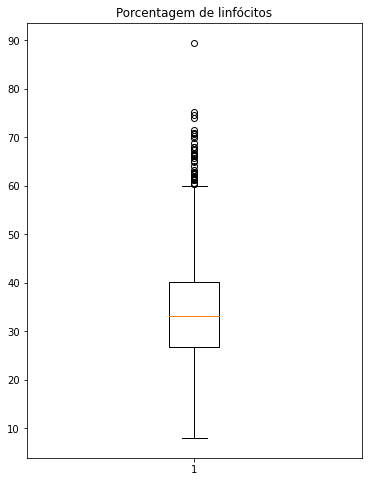

In [25]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXLYPCT'])
plt.title("Porcentagem de linfócitos")
plt.show()

### LBXMOPCT: Porcentagem de monócitos
Faixa de valor 3,8 a 13,5

In [26]:
df.LBXMOPCT.describe()

count    7523.000000
mean        8.199521
std         2.232815
min         0.700000
25%         6.700000
50%         7.900000
75%         9.300000
max        57.200000
Name: LBXMOPCT, dtype: float64

In [27]:
df_2.LBXMOPCT.describe()

count    2256.000000
mean        8.213963
std         2.178061
min         1.100000
25%         6.700000
50%         8.000000
75%         9.300000
max        22.500000
Name: LBXMOPCT, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior

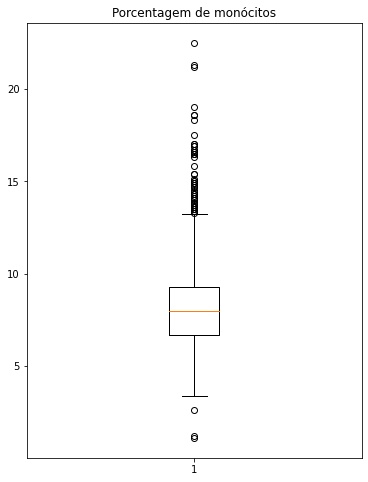

In [28]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXMOPCT'])
plt.title("Porcentagem de monócitos")
plt.show()

### LBXNEPCT: Porcentagem de neutrofilos segmentados
Faixa de valor 37,8 a 78,1

In [29]:
df.LBXNEPCT.describe()

count    7523.000000
mean       54.089273
std        11.345314
min         8.400000
25%        47.400000
50%        55.100000
75%        61.900000
max        92.800000
Name: LBXNEPCT, dtype: float64

In [30]:
df_2.LBXNEPCT.describe()

count    2256.000000
mean       53.924557
std        11.360216
min         8.400000
25%        47.300000
50%        54.900000
75%        61.625000
max        89.200000
Name: LBXNEPCT, dtype: float64

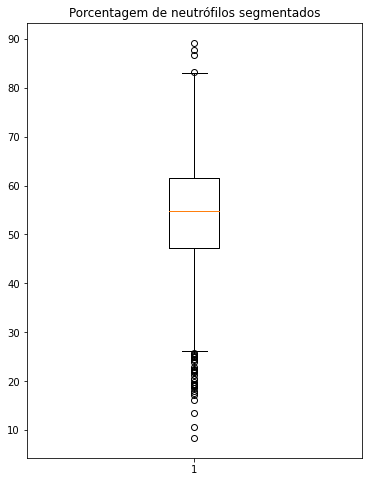

In [31]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXNEPCT'])
plt.title("Porcentagem de neutrófilos segmentados")
plt.show()

### LBXEOPCT: Porcentagem de eosinófilo
Faixa de valor 0,6 a 8,5

In [32]:
df.LBXEOPCT.describe().round(4)

count    7523.0000
mean        2.9747
std         2.3330
min         0.0000
25%         1.5000
50%         2.4000
75%         3.7000
max        29.1000
Name: LBXEOPCT, dtype: float64

In [33]:
df_2.LBXEOPCT.describe().round(4)

count    2256.0000
mean        3.0357
std         2.4275
min         0.0000
25%         1.5000
50%         2.4000
75%         3.8250
max        29.1000
Name: LBXEOPCT, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior

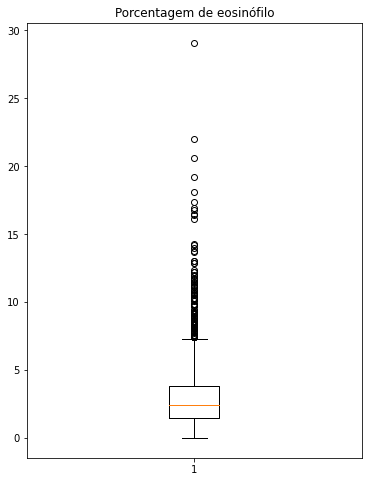

In [34]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXEOPCT'])
plt.title("Porcentagem de eosinófilo")
plt.show()

### LBXBAPCT: Porcentagem de basófilo
Faixa de valor 0,1 a 1,7

In [35]:
df.LBXBAPCT.describe()

count    7523.000000
mean        0.755045
std         0.329833
min         0.100000
25%         0.500000
50%         0.700000
75%         0.900000
max         4.800000
Name: LBXBAPCT, dtype: float64

In [36]:
df_2.LBXBAPCT.describe()

count    2256.000000
mean        0.753812
std         0.312253
min         0.100000
25%         0.500000
50%         0.700000
75%         0.900000
max         3.000000
Name: LBXBAPCT, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam o limite superior estabelecido.

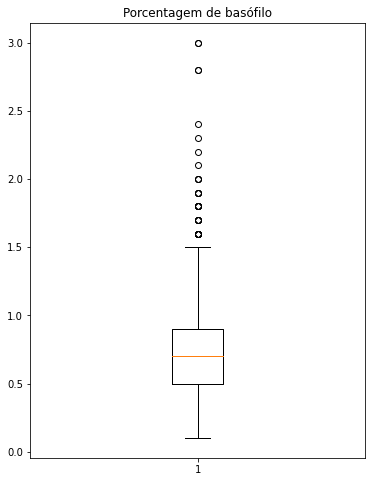

In [37]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXBAPCT'])
plt.title("Porcentagem de basófilo")
plt.show()

### LBXRBCSI: Contagem de glóbulos vermelhos
Faixa de valor 3,64 a 5,68

In [45]:
df.LBXRBCSI.describe()

count    7528.000000
mean        4.733653
std         0.480037
min         2.320000
25%         4.420000
50%         4.710000
75%         5.030000
max         7.840000
Name: LBXRBCSI, dtype: float64

In [46]:
df_2.LBXRBCSI.describe()

count    2256.000000
mean        4.729725
std         0.469877
min         2.320000
25%         4.420000
50%         4.720000
75%         5.020000
max         6.990000
Name: LBXRBCSI, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior.

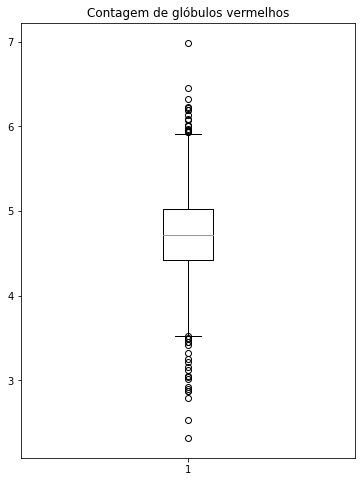

In [47]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXRBCSI'])
plt.title("Contagem de glóbulos vermelhos")
plt.show()

### LBXHGB: Hemoglobina
Faixa de valor 10,6 a 17,5

In [48]:
df.LBXHGB.describe()

count    7528.000000
mean       13.726275
std         1.510789
min         6.400000
25%        12.800000
50%        13.700000
75%        14.700000
max        19.900000
Name: LBXHGB, dtype: float64

In [49]:
df_2.LBXHGB.describe()

count    2256.000000
mean       13.730452
std         1.504326
min         7.500000
25%        12.800000
50%        13.700000
75%        14.700000
max        19.900000
Name: LBXHGB, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior.

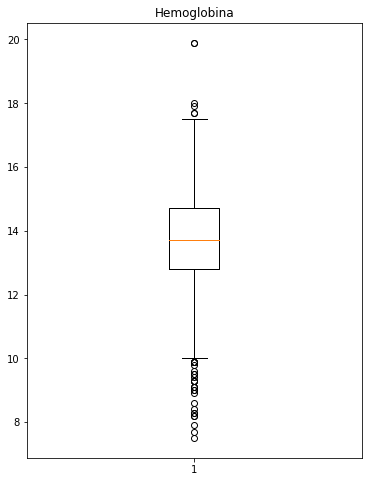

In [50]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXHGB'])
plt.title("Hemoglobina")
plt.show()

Um gráfico de dispersão ajuda a observar a distribuição das leituras do parâmetro, a fim de ter noção da concentração de valores no nível mais baixo, nível central e nível superior.

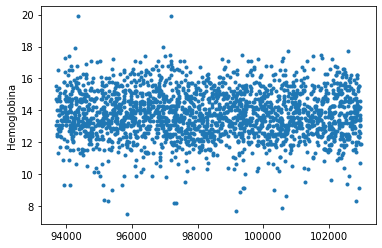

In [51]:
plt.scatter(df_2['SEQN'], df_2['LBXHGB'], marker='.')
plt.ylabel('Hemoglobina')
plt.show()

### LBXHCT: Hematrócrito
Faixa de valor 32 a 51,4

In [52]:
df.LBXHCT.describe()

count    7528.000000
mean       40.849601
std         4.169070
min        23.000000
25%        38.000000
50%        40.700000
75%        43.600000
max        58.800000
Name: LBXHCT, dtype: float64

In [53]:
df_2.LBXHCT.describe()

count    2256.000000
mean       40.857181
std         4.167927
min        23.000000
25%        38.100000
50%        40.800000
75%        43.700000
max        58.800000
Name: LBXHCT, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior.

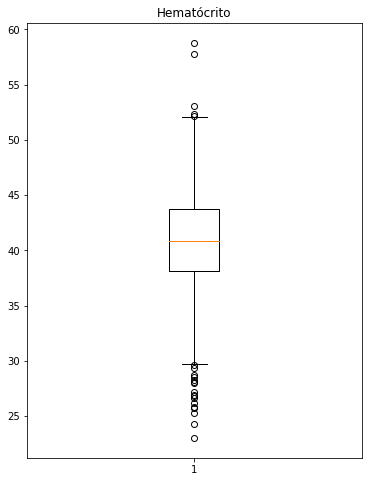

In [54]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXHCT'])
plt.title("Hematócrito")
plt.show()

Por se tratar de um parâmetro de alta imporância, um gráfico de dispersão foi gerado a fim de verificar a distribuição dos valores, e avaliar visualmente a concentração em níveis mais baixos, na área central, e no nível superior.

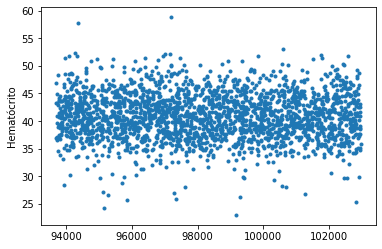

In [55]:
plt.scatter(df_2['SEQN'], df_2['LBXHCT'], marker='.')
plt.ylabel('Hematócrito')
plt.show()

### LBXMCVSI: Volume celular médio (fL)
Faixa de valor 74,6 a 99,1

In [56]:
df.LBXMCVSI.describe()

count    7528.000000
mean       86.563470
std         6.594074
min        35.400000
25%        82.900000
50%        87.100000
75%        90.900000
max       114.600000
Name: LBXMCVSI, dtype: float64

In [57]:
df_2.LBXMCVSI.describe()

count    2256.000000
mean       86.619902
std         6.317923
min        50.800000
25%        83.000000
50%        87.100000
75%        90.800000
max       113.100000
Name: LBXMCVSI, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior.

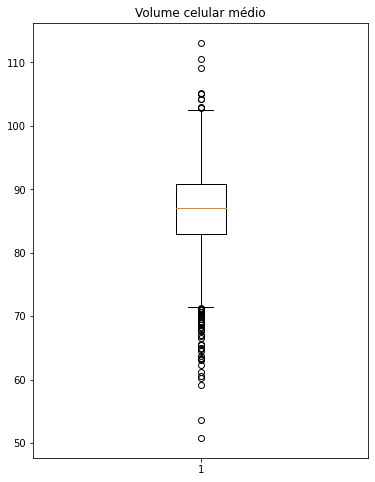

In [59]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXMCVSI'])
plt.title("Volume celular médio")
plt.show()

### LBXMCHSI: Hemoglobina celular média (pg)
Faixa de valor 24,3 a 34

In [60]:
df.LBXMCHSI.describe()

count    7528.000000
mean       29.074110
std         2.538204
min        12.400000
25%        27.775000
50%        29.300000
75%        30.700000
max        39.200000
Name: LBXMCHSI, dtype: float64

In [61]:
df_2.LBXMCHSI.describe()

count    2256.000000
mean       29.094637
std         2.429410
min        14.300000
25%        27.800000
50%        29.300000
75%        30.700000
max        39.200000
Name: LBXMCHSI, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior.

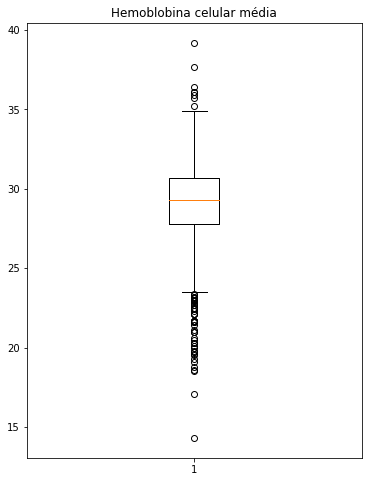

In [62]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXMCHSI'])
plt.title("Hemoblobina celular média")
plt.show()

### LBXMC: Concentração de Hemoglobina Média da Célula. (g/dL)
Faixa de valor 32,1 a 35,3

In [63]:
df.LBXMC.describe()

count    7528.000000
mean       33.569075
std         0.932988
min        25.200000
25%        33.000000
50%        33.600000
75%        34.200000
max        38.300000
Name: LBXMC, dtype: float64

In [64]:
df_2.LBXMC.describe()

count    2256.000000
mean       33.575532
std         0.911092
min        28.100000
25%        33.000000
50%        33.600000
75%        34.200000
max        38.300000
Name: LBXMC, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior.

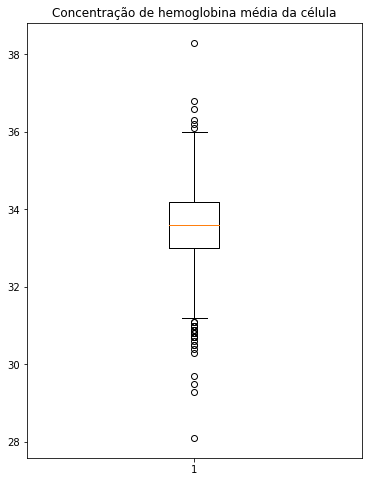

In [65]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXMC'])
plt.title("Concentração de hemoglobina média da célula")
plt.show()

### LBXRDW: Largura de distribuição de células vermelhas (%)
Faixa de valor 11,4 a 15,3

In [66]:
df.LBXRDW.describe()

count    7528.000000
mean       13.775319
std         1.271054
min        11.300000
25%        13.000000
50%        13.500000
75%        14.200000
max        29.200000
Name: LBXRDW, dtype: float64

In [67]:
df_2.LBXRDW.describe()

count    2256.000000
mean       13.743440
std         1.192181
min        11.400000
25%        13.000000
50%        13.500000
75%        14.100000
max        23.100000
Name: LBXRDW, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam o limite superior.

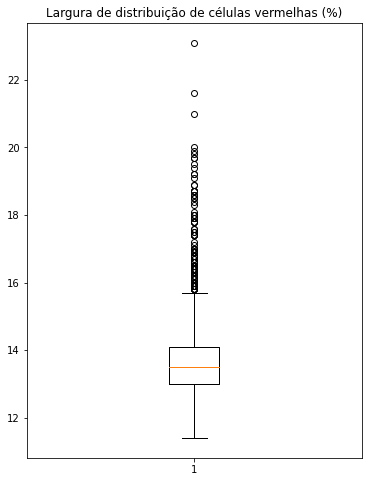

In [68]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXRDW'])
plt.title("Largura de distribuição de células vermelhas (%)")
plt.show()

### LBXPLTSI: Contagem de plaquetas (1000 células/uL)
Faixa de valor 152 a 441

In [69]:
df.LBXPLTSI.describe()

count    7528.000000
mean      259.250133
std        70.689106
min         8.000000
25%       211.000000
50%       251.000000
75%       300.000000
max       818.000000
Name: LBXPLTSI, dtype: float64

In [70]:
df_2.LBXPLTSI.describe()

count    2256.000000
mean      260.537234
std        70.714864
min        61.000000
25%       211.000000
50%       253.000000
75%       302.000000
max       696.000000
Name: LBXPLTSI, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior.

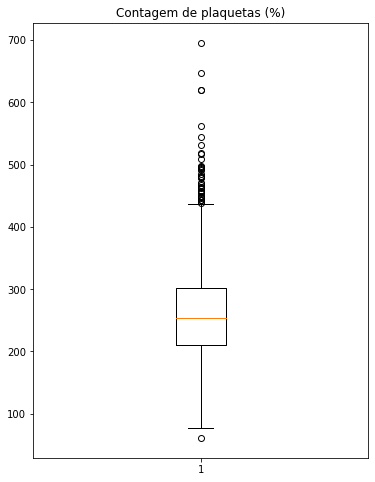

In [71]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXPLTSI'])
plt.title("Contagem de plaquetas (%)")
plt.show()

### LBXMPSI: Volume plaquetário médio (fL)
Faixa de valor 6,8 a 10,2

In [72]:
df.LBXMPSI.describe()

count    7528.000000
mean        8.093876
std         0.911377
min         5.400000
25%         7.500000
50%         8.000000
75%         8.700000
max        13.000000
Name: LBXMPSI, dtype: float64

In [73]:
df_2.LBXMPSI.describe()

count    2256.000000
mean        8.097828
std         0.923134
min         5.400000
25%         7.400000
50%         8.000000
75%         8.700000
max        11.900000
Name: LBXMPSI, dtype: float64

Para este parâmetro existe ocorrência de pacientes que extrapolam tanto os limites superior quanto inferior

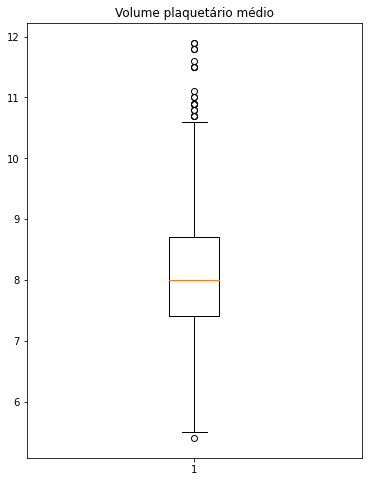

In [74]:
plt.figure(figsize=(6, 8))
plt.boxplot(df_2['LBXMPSI'])
plt.title("Volume plaquetário médio")
plt.show()

In [75]:
# Avaliar quantos pacientes estão extrapolando cada um dos parâmetros

In [422]:
selecao1_sup = df_2[(df_2['LBXWBCSI'] >= 12.9)]
selecao1_inf = df_2[(df_2['LBXWBCSI'] <= 3.9)]

print(selecao1_sup.shape)
print(selecao1_inf.shape)

selecao1_sup['count1'] = 1
selecao1_inf['count1'] = 1

(44, 16)
(65, 16)


<ipython-input-422-aa5a67ee385b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao1_sup['count1'] = 1
<ipython-input-422-aa5a67ee385b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao1_inf['count1'] = 1


In [423]:
selecao2_sup = df_2[(df_2['LBXLYPCT'] >= 47.9)]
selecao2_inf = df_2[(df_2['LBXLYPCT'] <= 14.1)]

print(selecao2_sup.shape)
print(selecao2_inf.shape)

selecao2_sup['count2'] = 1
selecao2_inf['count2'] = 1

(231, 16)
(35, 16)


<ipython-input-423-589a1a94f81f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao2_sup['count2'] = 1
<ipython-input-423-589a1a94f81f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao2_inf['count2'] = 1


In [424]:
selecao3_sup = df_2[(df_2['LBXMOPCT'] >= 13.5)]
selecao3_inf = df_2[(df_2['LBXMOPCT'] <= 3.8)]

print(selecao3_sup.shape)
print(selecao3_inf.shape)

selecao3_sup['count3'] = 1
selecao3_inf['count3'] = 1

(55, 16)
(11, 16)


<ipython-input-424-86e6f61b725a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao3_sup['count3'] = 1
<ipython-input-424-86e6f61b725a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao3_inf['count3'] = 1


In [425]:
selecao4_sup = df_2[(df_2['LBXNEPCT'] >= 78.1)]
selecao4_inf = df_2[(df_2['LBXNEPCT'] <= 37.8)]

print(selecao4_sup.shape)
print(selecao4_inf.shape)

selecao4_sup['count4'] = 1
selecao4_inf['count4'] = 1

(20, 16)
(214, 16)


<ipython-input-425-5b7e134335a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao4_sup['count4'] = 1
<ipython-input-425-5b7e134335a8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao4_inf['count4'] = 1


In [426]:
selecao5_sup = df_2[(df_2['LBXEOPCT'] >= 8.5)]
selecao5_inf = df_2[(df_2['LBXEOPCT'] <= 0.6)]

print(selecao5_sup.shape)
print(selecao5_inf.shape)

selecao5_sup['count5'] = 1
selecao5_inf['count5'] = 1

(77, 16)
(95, 16)


<ipython-input-426-22019eebaf10>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao5_sup['count5'] = 1
<ipython-input-426-22019eebaf10>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao5_inf['count5'] = 1


In [427]:
selecao6_sup = df_2[(df_2['LBXBAPCT'] >= 1.7)]
selecao6_inf = df_2[(df_2['LBXBAPCT'] <= 0.1)]

print(selecao6_sup.shape)
print(selecao6_inf.shape)

selecao6_sup['count6'] = 1
selecao6_inf['count6'] = 1

(26, 16)
(4, 16)


<ipython-input-427-b5e60e022cc6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao6_sup['count6'] = 1
<ipython-input-427-b5e60e022cc6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao6_inf['count6'] = 1


In [428]:
selecao7_sup = df_2[(df_2['LBXRBCSI'] >= 5.86)]
selecao7_inf = df_2[(df_2['LBXRBCSI'] <= 3.64)]

print(selecao7_sup.shape)
print(selecao7_inf.shape)

selecao7_sup['count7'] = 1
selecao7_inf['count7'] = 1

(26, 16)
(25, 16)


<ipython-input-428-d4c985bcd9ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao7_sup['count7'] = 1
<ipython-input-428-d4c985bcd9ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao7_inf['count7'] = 1


In [429]:
selecao8_sup = df_2[(df_2['LBXHGB'] >= 17.5)]
selecao8_inf = df_2[(df_2['LBXHGB'] <= 10.6)]

print(selecao8_sup.shape)
print(selecao8_inf.shape)

selecao8_sup['count8'] = 1
selecao8_inf['count8'] = 1

(9, 16)
(56, 16)


<ipython-input-429-beabc715b97e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao8_sup['count8'] = 1
<ipython-input-429-beabc715b97e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao8_inf['count8'] = 1


In [430]:
selecao9_sup = df_2[(df_2['LBXHCT'] >= 51.4)]
selecao9_inf = df_2[(df_2['LBXHCT'] <= 32)]

print(selecao9_sup.shape)
print(selecao9_inf.shape)

selecao9_sup['count9'] = 1
selecao9_inf['count9'] = 1

(16, 16)
(38, 16)


<ipython-input-430-0796b2c4ce6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao9_sup['count9'] = 1
<ipython-input-430-0796b2c4ce6a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao9_inf['count9'] = 1


In [431]:
selecao10_sup = df_2[(df_2['LBXMCVSI'] >= 99.1)]
selecao10_inf = df_2[(df_2['LBXMCVSI'] <= 74.6)]

print(selecao10_sup.shape)
print(selecao10_inf.shape)

selecao10_sup['count10'] = 1
selecao10_inf['count10'] = 1

(37, 16)
(78, 16)


<ipython-input-431-46eaa9785bd1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao10_sup['count10'] = 1
<ipython-input-431-46eaa9785bd1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao10_inf['count10'] = 1


In [432]:
selecao11_sup = df_2[(df_2['LBXMC'] >= 35.3)]
selecao11_inf = df_2[(df_2['LBXMC'] <= 32.1)]

print(selecao11_sup.shape)
print(selecao11_inf.shape)

selecao11_sup['count11'] = 1
selecao11_inf['count11'] = 1

(57, 16)
(128, 16)


<ipython-input-432-952ffa64859a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao11_sup['count11'] = 1
<ipython-input-432-952ffa64859a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao11_inf['count11'] = 1


In [433]:
selecao12_sup = df_2[(df_2['LBXRDW'] >= 15.3)]
selecao12_inf = df_2[(df_2['LBXRDW'] <= 11.4)]

print(selecao12_sup.shape)
print(selecao12_inf.shape)

selecao12_sup['count12'] = 1
selecao12_inf['count12'] = 1

(212, 16)
(1, 16)


<ipython-input-433-7c00bf5b77a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao12_sup['count12'] = 1
<ipython-input-433-7c00bf5b77a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao12_inf['count12'] = 1


In [434]:
selecao13_sup = df_2[(df_2['LBXPLTSI'] >= 441)]
selecao13_inf = df_2[(df_2['LBXPLTSI'] <= 152)]

print(selecao13_sup.shape)
print(selecao13_inf.shape)

selecao13_sup['count13'] = 1
selecao13_inf['count13'] = 1

(39, 16)
(73, 16)


<ipython-input-434-1d68fa9bd42c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao13_sup['count13'] = 1
<ipython-input-434-1d68fa9bd42c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao13_inf['count13'] = 1


In [435]:
selecao14_sup = df_2[(df_2['LBXMPSI'] >= 10.2)]
selecao14_inf = df_2[(df_2['LBXMPSI'] <= 6.8)]

print(selecao14_sup.shape)
print(selecao14_inf.shape)

selecao14_sup['count14'] = 1
selecao14_inf['count14'] = 1

(58, 16)
(169, 16)


<ipython-input-435-c8f7cce8ede6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao14_sup['count14'] = 1
<ipython-input-435-c8f7cce8ede6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao14_inf['count14'] = 1


In [436]:
# Unificando tabela de pacientes

pacientes_fora_limites2 = selecao1_sup.append([selecao1_inf, selecao2_sup, selecao2_inf, selecao3_sup, selecao3_inf,
                                     selecao4_sup, selecao4_inf, selecao5_sup, selecao5_inf, selecao6_sup, selecao6_inf,
                                     selecao7_sup, selecao7_inf, selecao8_sup, selecao8_inf, selecao9_sup, selecao9_inf,
                                     selecao10_sup, selecao10_inf, selecao11_sup, selecao11_inf, selecao12_sup, selecao12_inf,
                                     selecao13_sup, selecao13_inf, selecao14_sup, selecao14_inf])

In [437]:
pacientes_fora_limites2

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,...,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14
3595,97671.0,14.8,25.4,7.2,64.3,2.1,1.1,4.41,12.0,35.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2856,96857.0,15.7,19.6,18.6,60.1,1.1,0.7,4.07,10.9,32.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3977,98108.0,13.2,57.4,6.0,34.9,1.5,0.3,4.73,12.1,36.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5562,99838.0,13.0,13.2,7.2,78.5,0.9,0.3,5.05,12.1,37.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8149,102714.0,15.7,28.2,6.3,59.2,5.4,1.1,5.12,12.6,39.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670,98861.0,9.0,66.3,6.6,23.9,2.4,0.9,4.33,12.6,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3175,97207.0,10.2,53.3,8.0,34.4,3.9,0.6,4.88,10.9,34.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7493,101978.0,6.3,50.9,7.3,40.8,0.5,0.5,4.19,11.6,34.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6198,100543.0,5.1,36.2,8.8,53.1,1.5,0.6,5.02,13.5,40.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [438]:
# Preenchendo o dataframe com valor nulo para realizar soma dos contadores. A partir do contadores será possível realizar a
# classificação dos pacientes.

pacientes_fora_limites2.fillna(0,inplace=True)

In [439]:
# Realizando soma dos contadores para cada paciente.

pacientes_fora_limites2['CountFinal'] = (pacientes_fora_limites2['count1'] + pacientes_fora_limites2['count2'] + 
                                        pacientes_fora_limites2['count3'] +
                                        pacientes_fora_limites2['count4'] + pacientes_fora_limites2['count5'] +
                                        pacientes_fora_limites2['count6'] + pacientes_fora_limites2['count7'] +
                                        pacientes_fora_limites2['count8'] + pacientes_fora_limites2['count9'] +
                                        pacientes_fora_limites2['count10'] + pacientes_fora_limites2['count11'] +
                                        pacientes_fora_limites2['count12'] + pacientes_fora_limites2['count13'] +
                                        pacientes_fora_limites2['count14'])

In [440]:
pacientes_fora_limites2.CountFinal.value_counts()

1.0    1899
Name: CountFinal, dtype: int64

In [441]:
grupo_classes = pacientes_fora_limites2.groupby('SEQN')

In [442]:
df_classes = grupo_classes[['CountFinal']].sum()

In [443]:
df_classes['Classificação'] = df_classes.CountFinal.apply(lambda x: 'Baixo Risco' if x ==0 else 'Medio risco' if x <=2 else 'Alto Risco')

In [444]:
df_classes.head(10)

,CountFinal,Classificação
SEQN,,
93704.0,1.0,Medio risco
93723.0,1.0,Medio risco
93730.0,1.0,Medio risco
93739.0,1.0,Medio risco
93752.0,1.0,Medio risco
93795.0,1.0,Medio risco
93809.0,1.0,Medio risco
93810.0,2.0,Medio risco
93847.0,1.0,Medio risco


In [445]:
df_classes.Classificação.value_counts()

Medio risco    747
Alto Risco     236
Name: Classificação, dtype: int64

In [447]:
# Realizando análise com a base principal - 2.256 instâncias.

df_3 = df_2.copy()
df_3 = df_3.append([pacientes_fora_limites2])
df_3.fillna(0,inplace=True)

(4155, 31)

In [448]:
grupo_classes_geral = df_3.groupby('SEQN')
df_classes_geral = grupo_classes_geral[['CountFinal']].sum()
df_classes_geral['CLASSE'] = df_classes_geral.CountFinal.apply(lambda x: 'Baixo Risco' if x == 0 else 'Médio Risco' if x <=2 else 'Alto Risco')

In [453]:
df_classes_geral.head(7)

,CountFinal,CLASSE
SEQN,,
93704.0,1.0,Médio Risco
93711.0,0.0,Baixo Risco
93712.0,0.0,Baixo Risco
93723.0,1.0,Médio Risco
93724.0,0.0,Baixo Risco
93727.0,0.0,Baixo Risco
93729.0,0.0,Baixo Risco


In [450]:
df_classes_geral.CLASSE.value_counts()

Baixo Risco    1273
Médio Risco     747
Alto Risco      236
Name: CLASSE, dtype: int64

In [ ]:
# Separação dos dataframes dos valores de referência superior e inferior

In [151]:
valores_referencia

,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI
0,3.9,14.1,3.8,37.8,0.6,0.1,3.64,10.6,32.0,74.6,24.3,32.1,11.4,152,6.8
1,12.9,47.9,13.5,78.1,8.5,1.7,5.86,17.5,51.4,99.1,34.0,35.3,16.3,441,10.2


In [391]:
valores_referencia_inferior = valores_referencia.drop([1], axis=0)
valores_referencia_inferior.insert(0,"SEQN",[0],True)
valores_referencia_inferior

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI
0,0,3.9,14.1,3.8,37.8,0.6,0.1,3.64,10.6,32.0,74.6,24.3,32.1,11.4,152,6.8


In [157]:
valores_referencia_superior = valores_referencia.drop([0], axis=0)
valores_referencia_superior.insert(0,"SEQN",[0],True)
valores_referencia_superior

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI
1,0,12.9,47.9,13.5,78.1,8.5,1.7,5.86,17.5,51.4,99.1,34.0,35.3,16.3,441,10.2


In [385]:
df_4 = df_2.copy()
df_4

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI
7169,101618.0,6.8,36.1,10.9,47.2,4.9,1.0,4.50,12.7,36.8,81.7,28.2,34.4,13.2,305.0,8.9
8097,102659.0,5.9,33.7,12.9,47.2,5.4,0.9,4.10,13.1,38.2,93.1,31.9,34.3,13.0,226.0,6.6
2058,95969.0,6.2,43.9,8.1,44.6,3.2,0.3,4.98,14.9,43.3,87.1,30.0,34.4,13.7,212.0,8.4
7937,102478.0,4.3,43.4,11.3,43.4,1.5,0.5,5.04,14.6,43.6,86.6,29.0,33.4,14.1,213.0,7.8
3595,97671.0,14.8,25.4,7.2,64.3,2.1,1.1,4.41,12.0,35.9,81.5,27.3,33.6,15.7,360.0,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,100803.0,7.7,57.8,5.8,28.8,7.1,0.6,4.54,11.8,34.4,75.8,26.0,34.3,12.7,244.0,6.8
2409,96358.0,8.4,42.0,4.8,50.1,2.0,1.2,4.88,14.0,41.3,84.7,28.8,34.0,13.5,227.0,8.0
644,94411.0,6.8,50.8,8.6,39.5,0.9,0.3,5.21,15.3,45.0,86.5,29.4,34.1,14.1,247.0,7.8
1413,95261.0,11.5,28.8,7.6,62.2,0.5,1.1,5.07,14.4,43.4,85.7,28.5,33.3,13.7,319.0,8.4


In [236]:
count_inferior = 0
count_superior = 0

for i in range(df_3.shape[0]):
    for j in range(df_3.shape[1]):
        if df_3.iat[i,j] <= valores_referencia_inferior.iat[0,j]:
            count_inferior = count_inferior + 1
            df_3.iat[i,j] > valores_referencia_superior.iat[0,j]
            count_superior = count_superior + 1
            if (count_inferior + count_superior) == 0:
                df_3['Classificação'] = 'Baixo risco'
            elif (count_inferior + count_superior) <= 2:
                df_3['Classificação'] = 'Medio risco'
            else:
                df_3['Classificação'] = 'Alto risco'
                

IndexError: index 16 is out of bounds for axis 0 with size 16

In [421]:
df_3

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,...,count6,count7,count8,count9,count10,count11,count12,count13,count14,CountFinal
7169,101618.0,6.8,36.1,10.9,47.2,4.9,1.0,4.50,12.7,36.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8097,102659.0,5.9,33.7,12.9,47.2,5.4,0.9,4.10,13.1,38.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2058,95969.0,6.2,43.9,8.1,44.6,3.2,0.3,4.98,14.9,43.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7937,102478.0,4.3,43.4,11.3,43.4,1.5,0.5,5.04,14.6,43.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3595,97671.0,14.8,25.4,7.2,64.3,2.1,1.1,4.41,12.0,35.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670,98861.0,9.0,66.3,6.6,23.9,2.4,0.9,4.33,12.6,36.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3175,97207.0,10.2,53.3,8.0,34.4,3.9,0.6,4.88,10.9,34.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7493,101978.0,6.3,50.9,7.3,40.8,0.5,0.5,4.19,11.6,34.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6198,100543.0,5.1,36.2,8.8,53.1,1.5,0.6,5.02,13.5,40.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# Conclusões

Base de dados inicial de 8.366 instâncias com 21 parâmetros de coleta de hemograma completo. Base de valores de referência superior e inferior composto por 14 parâmetros, a fim de seguir com a análise da base de dados inicial. Utilizada amostra aleatória de 30% da base para realizar análise estatística descritiva, e classificação de indivíduos de acordo com a normalidade em relação às faixas de valores definidas pela pesquisa.